# Features and feature detection
---

Most of you will have played the jigsaw puzzle games. You get a lot of small pieces of an image, where you need to assemble them correctly to form a big real image. The question is, how you do it?

![Corners](images/Corners_1.png)

But it all depends on the most basic question: How do you play jigsaw puzzles? How do you arrange lots of scrambled image pieces into a big single image? How can you stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you can point out one. That is why even small children can simply play these games. We search for these features in an image, find them, look for the same features in other images and align them. That's it. (In jigsaw puzzle, we look more into continuity of different images). 

So our one basic question expands to more in number, but becomes more specific. What are these features?.

![Corners 2](images/Corners_2.png)

In computer vision and image processing, a feature is a piece of information about the content of an image; typically about whether a certain region of the image has certain properties. Features may be specific structures in the image such as points, edges or objects. Features may also be the result of a general neighborhood operation or feature detection applied to the image. Other examples of features are related to motion in image sequences, or to shapes defined in terms of curves or boundaries between different image regions.

![Building features](images/feature_building.jpg)

The image is very simple. At the top of image, six small image patches are given. Question for you is to find the exact location of these patches in the original image. How many correct results can you find?

A and B are flat surfaces and they are spread over a lot of area. It is difficult to find the exact location of these patches.

C and D are much more simple. They are edges of the building. You can find an approximate location, but exact location is still difficult. This is because the pattern is same everywhere along the edge. At the edge, however, it is different. An edge is therefore better feature compared to flat area, but not good enough (It is good in jigsaw puzzle for comparing continuity of edges).

Finally, E and F are some corners of the building. And they can be easily found. Because at the corners, wherever you move this patch, it will look different. So they can be considered as good features. So now we move into simpler (and widely used image) for better understanding.



# Harris Corner Detection
---

One early attempt to find corners was done by Chris Harris & Mike Stephens in their paper A Combined Corner and Edge Detector in 1988, so now it is called the Harris Corner Detector.

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

![Corners 3](images/Corners_3.jpg)

OpenCV has the function cv2.cornerHarris(). Its arguments are:

- img: Input image. It should be grayscale and float32 type.
- blockSize: It is the size of neighbourhood considered for corner detection
- ksize: Aperture parameter of the Sobel derivative used.
- k: Harris detector free parameter in the equation.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

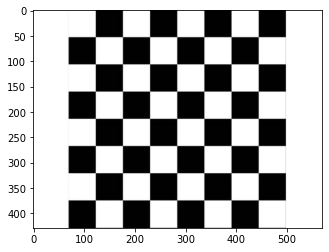

In [9]:
image = cv2.imread('images/chess.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

### Corner detection

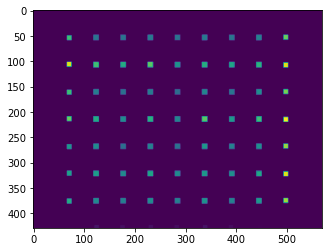

In [16]:
# Detect corners using Harris Corner detector

# - img: Input image. It should be grayscale and float32 type.
# - blockSize: It is the size of neighbourhood considered for corner detection
# - ksize: Aperture parameter of the Sobel derivative used.
# - k: Harris detector free parameter in the equation.

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corners to enhance center points
kernel = np.ones((5,5), np.uint8)
dst = cv2.dilate(dst,kernel, iterations=2)

plt.imshow(dst)

### Detect "strong" corners

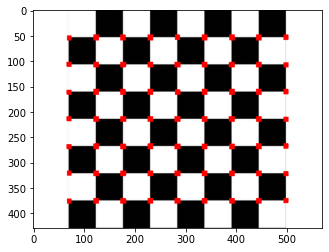

In [21]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image)

# Change all the pixels of the corners to red
corner_image[dst>thresh]=[255,0,0]

plt.imshow(corner_image)

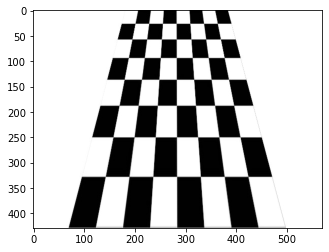

In [5]:
image_shear = cv2.imread('images/chess_transform.jpg')
gray_shear = cv2.cvtColor(image_shear,cv2.COLOR_BGR2GRAY)

plt.imshow(gray_shear, cmap='gray')

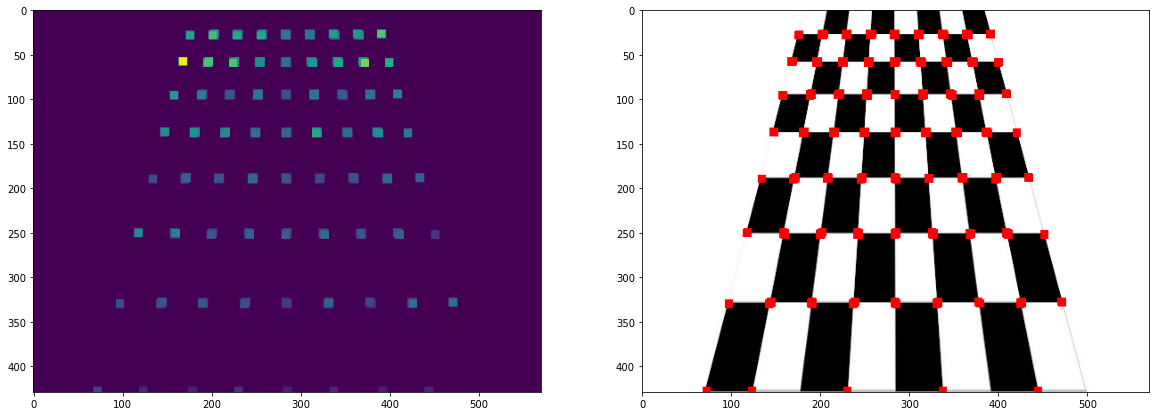

In [22]:
# Detect corners
dst_shear = cv2.cornerHarris(gray_shear,2,3,0.04)

# Dilate corners to enhance center points

kernel = np.ones((5,5), np.uint8)
dst_shear = cv2.dilate(dst_shear,kernel, iterations=2)

# This value vary depending on the image and how many corners you want to detect
thresh_shear = 0.1*dst_shear.max()

# Create an image copy to draw corners on
corner_image_shear = np.copy(image_shear)

# Change all the pixels of the corners to red
corner_image_shear[dst_shear>thresh_shear]=[255,0,0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(dst_shear)
ax2.imshow(corner_image_shear)

# Shi-Tomasi Corner Detector & Good Features to Track
---

In 1994, J. Shi and C. Tomasi made a small modification to the Harris corner detector in their paper Good Features to Track which shows better results when compared to the original algorithm.

OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners in the image. As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

With all this information, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

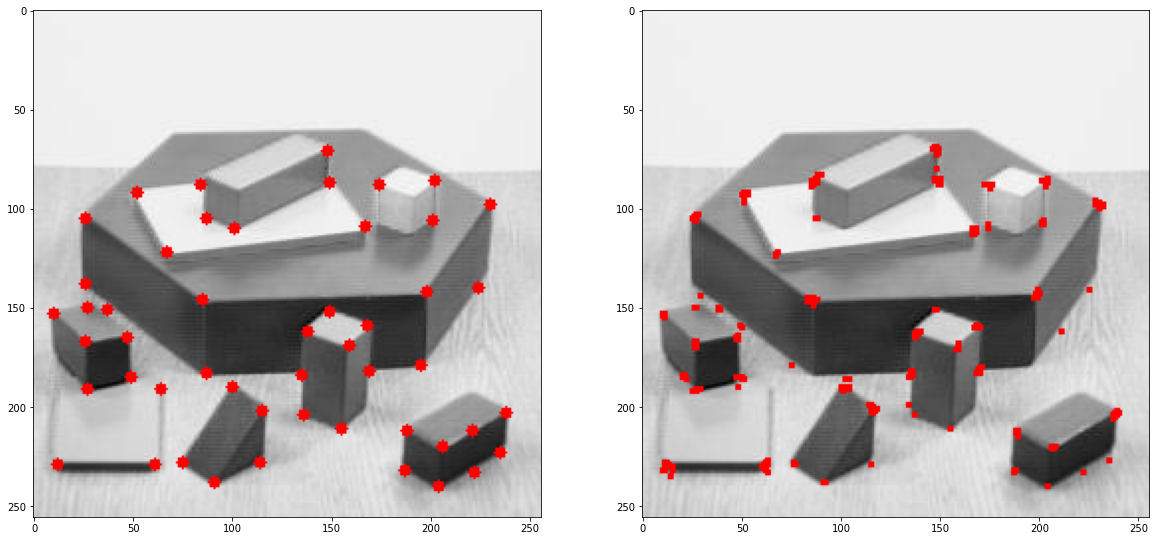

In [24]:
image = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners_shi = np.copy(image)
# Shi and Tomasi corner detector

# image: grayscale image
# N number of corners
# Quality of the corner, between 0 and 1
# Euclidian distance bewteen corners
corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(corners_shi,(x,y),3,(255,0,0),-1)

# Detect corners with Harris
dst = cv2.cornerHarris(gray,2,3,0.04)

kernel = np.ones((3,3), np.uint8)
dst = cv2.dilate(dst,kernel, iterations=1)

thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image)

# Change all the pixels of the corners to red
corner_image[dst>thresh]=[255,0,0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(corners_shi)
ax2.imshow(corner_image)